# Лабораторная работа №14 Аппроксимации граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности.



## **Введение**

### Цель работы
Ознакомиться с наиболее часто применяемыми способами аппроксимации граничных условий второго рода (граничных условий (ГУ) Неймана) в методе конечных разностей (на примере ГУ для одномерного нестационарного уравнения теплопроводности).


### Условия задания

Условия задания были выбраны исходя из варианта

In [34]:
VARIANT_NUMBER = 28

In [230]:
a = 0
b = 2
k = 1
T = 0.2
phi = lambda x: x
g1 = lambda t: 2
g2 = lambda t: 0
f = lambda x, t: x

h = 0.1
t = 0.5 * h * h / 2

NK = int((b - a) / h) + 1 
NT = int(T / t) + 1

## **Программная реализация**

Характеристики устройства:
* Операционная система: Ubuntu 18.04.4 LTS (Bionic Beaver)
* Процессор: Intel Core i7 8550U
* Объем и тип оперативной памяти: 16 Gb DDR4
* Тип диска, на которой установленна ОС: HDD

В качестве языка программирования использован Python 3.8.5  и среда программирования Jupyter Lab 2.2.7. Использовались библиотеки numpy - для работы с матрицами, векторизации функций, matplolib - для визуализации, а также встроенная библиотека с простейшими математическими функциями math.

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex

from math import *
%matplotlib inline

# Задание

Найти приближенное решение начально-краевой задачи для уравнения теплопроводности:

$$
\begin{equation}
  \begin{cases}
    \frac{\partial u}{dt}=k\frac{\partial^2u}{\partial x^2}+f(x,t),  a < x < b, 0 < t \le T \\
    u(a, t) = g_1(t), \frac{\partial u}{\partial x}(b,t) = g_2(t),  0 < t \le T,\\
    u(x, 0) = \varphi(x), a \le x \le b.
  \end{cases}
\end{equation}
$$

используя явную и неявную разностные схемы.

### Явная схема

*Левая разность*

Используем аппроксимацию производной:
$$
\frac{\partial u}{\partial x} =\frac{u(x_n, \tau_N) - u(x_{n-1}, \tau_N)}{h} 
$$
Тогда: 
$$
g_2(\tau_N)=\frac{u(x_n, \tau_N) - u(x_{n-1}, \tau_N)}{h} 
$$
И
$$
u(x_n, \tau_N)=u(x_{n-1}, \tau_N)+hg_2(\tau_N)
$$

*Центральная разность*
$$
\frac{\partial u}{\partial x} =\frac{u(x_{n+1}, \tau_N) - u(x_{n-1}, \tau_N)}{2h} 
$$
Тогда: 
$$
g_2(\tau_N)=\frac{u(x_{n+1}, \tau_N) - u(x_{n-1}, \tau_N)}{2h} 
$$
И
$$
u(x_{n+1}, \tau_N)=u(x_{n-1}, \tau_N)+2hg_2(\tau_N)
$$


In [231]:
def solve1l():
    M = np.zeros(shape=(NT, NK))
    M[:, 0] = np.vectorize(g1)(np.linspace(0, T, NT))
    M[0, :] = np.vectorize(phi)(np.linspace(a, b, NK))
    
    for i in range(1, NT):
        for j in range(1, NK - 1):
            xj = a + j*h
            M[i][j] = k * M[i-1][j+1]*t/(h*h) + \
                      (1 - 2*k*t/(h*h)) * M[i-1][j] + \
                      k*M[i-1][j-1]*t/(h*h) + \
                      t*f(xj, i*t)
        M[i][-1] = M[i][-2] + h * g2(t * i)
    return M

In [232]:
def solve1c():
    M = np.zeros(shape=(NT, NK))
    M[:, 0] = np.vectorize(g1)(np.linspace(0, T, NT))
    M[0, :] = np.vectorize(phi)(np.linspace(a, b, NK))
    
    for i in range(1, NT):
        for j in range(1, NK - 1):
            xj = a + j*h
            M[i][j] = k * M[i-1][j+1]*t/(h*h) + \
                      (1 - 2*k*t/(h*h)) * M[i-1][j] + \
                      k*M[i-1][j-1]*t/(h*h) + \
                      t*f(xj, i*t)
        M[i][-1] = M[i][-3] + 2 * h * g2(t * i)
    return M

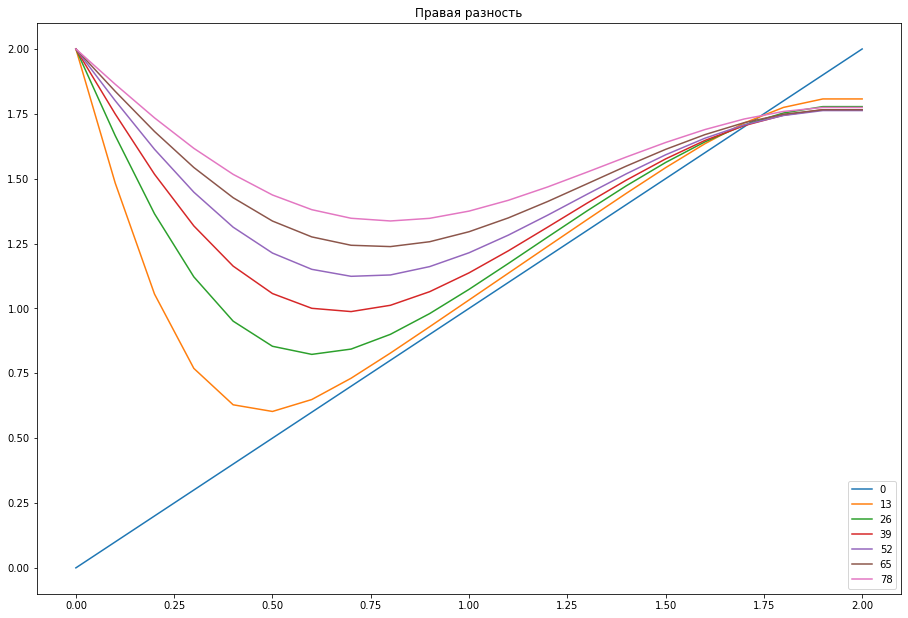

In [233]:
matrix = solve1l()
X = np.linspace(a, b, NK)

fig = plt.figure()

for i in range(0, NT, NT//6):
    plt.plot(X, matrix[i], label=i)
    plt.title("Правая разность")
    fig.set_size_inches(15.5, 10.5)

plt.legend()

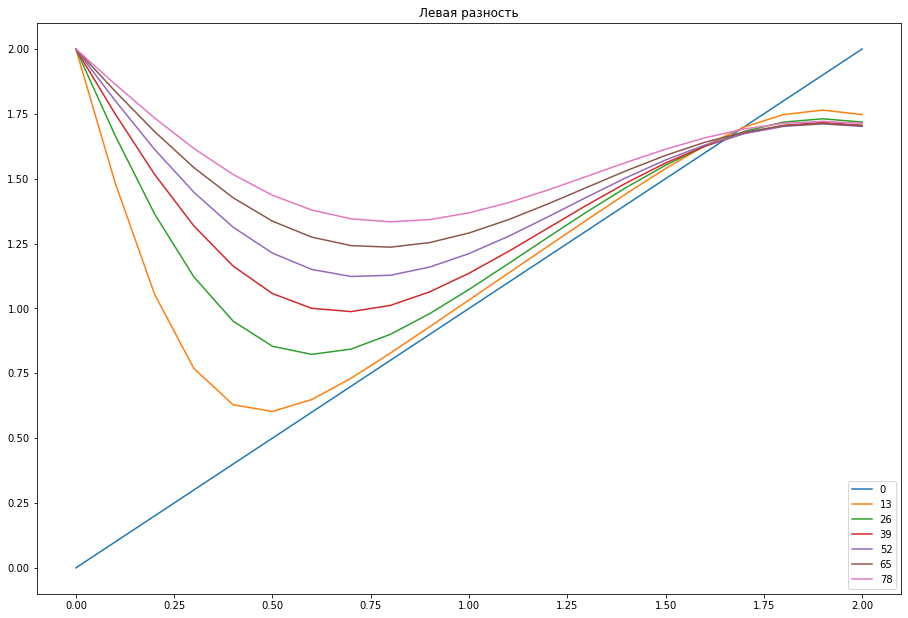

In [234]:
matrix = solve1c()
X = np.linspace(a, b, NK)

fig = plt.figure()


for i in range(0, NT, NT//6):
    plt.plot(X, matrix[i], label=i)
    plt.title("Левая разность")
    fig.set_size_inches(15.5, 10.5)
    
plt.legend()
plt.show()

Для оценки работы методов использовался метод Рунге, в качестве нормы было выбрано $L_{\infty}$ и $L_{2}$. Временные слои были выбраны следующие - $t_{n1} = 30$ и $t_{n2} = 75$

In [235]:
tn1 = 30
tn2 = 75

ns = [3, 6, 12, 24, 48]
table = np.zeros(shape=(len(ns) - 1, 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    M1 = solve1l()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    M2 = solve1l()
    
    sol1l = M1[tn1]
    sol1c = M2[tn1]
    sol2l = M1[tn2]
    sol2c = M2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))


df = pd.DataFrame(table, columns=['N', 
                                  't', 
                                  's(t=tn1)', 
                                  's(t=tn2})', 
                                  'max|tn1|', 'max|tn2|'])

df

,N,t,s(t=tn1),s(t=tn2}),max|tn1|,max|tn2|
0,3.0,0.0001,0.384813,0.361715,0.585179,0.562646
1,6.0,0.0001,0.086297,0.085640,0.211396,0.203392
2,12.0,0.0001,0.037349,0.030460,0.093434,0.074918
3,24.0,0.0001,0.014620,0.011964,0.038057,0.034086


In [223]:
tn1 = 25
tn2 = 75

ns = [5, 10, 20, 40]
table = np.zeros(shape=(len(ns) - 1, 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    M1 = solve1c()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    M2 = solve1c()
    
    sol1l = M1[tn1]
    sol1c = M2[tn1]
    sol2l = M1[tn2]
    sol2c = M2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))


df = pd.DataFrame(table, columns=['N', 
                                  't', 
                                  's(t=tn1)', 
                                  's(t=tn2)', 
                                  'max|tn1|', 'max|tn2|'])

df

,N,t,s(t=tn1),s(t=tn2),max|tn1|,max|tn2|
0,5.0,0.0001,0.607958,0.541426,0.754641,0.714964
1,10.0,0.0001,0.113608,0.084413,0.299772,0.255719
2,20.0,0.0001,0.025115,0.019146,0.111234,0.088350


Шаблон неявной схемы:
<img src="http://xreferat.com/image/54/1306483972_53.png" width="200" height="200">

Запишем аппроксимацию уравнения теплопроводности для неявной схемы:

$$
 \frac{u(x, t + \tau) - u(x, t)}{\tau} = k\frac{u(x-h, t+\tau)-2u(x, t+\tau)+u(x+h, t+\tau)}{h^2} +f(x,t)
$$

В этой схеме $u(x-h, t+\tau), u(x, t+\tau), u(x+h, t+\tau)$ - неизвестные значения. Выразим неизвестные значения:

$$
\frac{ k\tau}{h^2}u(x-h,t+\tau)-(1+\frac{2k \tau}{h^2})u(x,t+\tau)+\frac{k\tau}{h^2}u(x+h,t+\tau)=-(u(x,t)+\tau f(x,t))
$$

Переобозначим коэффициенты при неизвестных:

$$
A_iu(x-h,t+\tau)-B_iu(x,t+\tau)+C_iu(x+h,t+\tau)=D_i
$$

Получили трехдиагональную систему линейных уравнений.

In [236]:
def solve2l():
    M = np.zeros(shape=(NT, NK))
    M[:, 0] = np.array([g1(i) for i in np.linspace(0, T, NT)])
    M[0, :] = np.array([phi(i) for i in np.linspace(a, b, NK)])
    
    for i in range(1, NT):
        M2 = np.zeros(shape=(NK-1, NK-1))
        Y = np.zeros(NK-1)
        M2[0][0] = -(1 + 2 * k * t / (h*h))
        M2[0][1] = t * k / (h*h)
        Y[0] = -(M[i-1][1] + t*f(a + i*h, i*t) + k * t * M[i][0]/(h*h))
        
        for j in range(1, NK-2):
            M2[j][j-1] = k * t/(h*h)
            M2[j][j] = -(1 + 2 * k * t/(h*h))
            M2[j][j+1] = k * t/(h*h)
            Y[j] = -(M[i-1][j+1] + t*f(a + j*h, i*t))
        M2[-1][-1] = -1
        M2[-1][-2] = 1
        Y[-1] = h * g2(t * i)
        
        M[i, 1:] = np.linalg.solve(M2, Y)
    return M

In [244]:
def solve2c():
    M = np.zeros(shape=(NT, NK))
    M[:, 0] = np.array([g1(i) for i in np.linspace(0, T, NT)])
    M[0, :] = np.array([phi(i) for i in np.linspace(a, b, NK)])
    
    for i in range(1, NT):
        M2 = np.zeros(shape=(NK-1, NK-1))
        Y = np.zeros(NK-1)
        M2[0][0] = -(1 + 2 * k * t / (h*h))
        M2[0][1] = t * k / (h*h)
        Y[0] = -(M[i-1][1] + t*f(a + i*h, i*t) + k * t * M[i][0]/(h*h))
        
        for j in range(1, NK-2):
            M2[j][j-1] = k * t/(h*h)
            M2[j][j] = -(1 + 2 * k * t/(h*h))
            M2[j][j+1] = k * t/(h*h)
            Y[j] = -(M[i-1][j+1] + t*f(a + j*h, i*t))
        M2[-1][-1] = -1
        M2[-1][-3] = 1
        Y[-1] = 2 * h * g2(t * i)
        
        M[i, 1:] = np.linalg.solve(M2, Y)
    return M

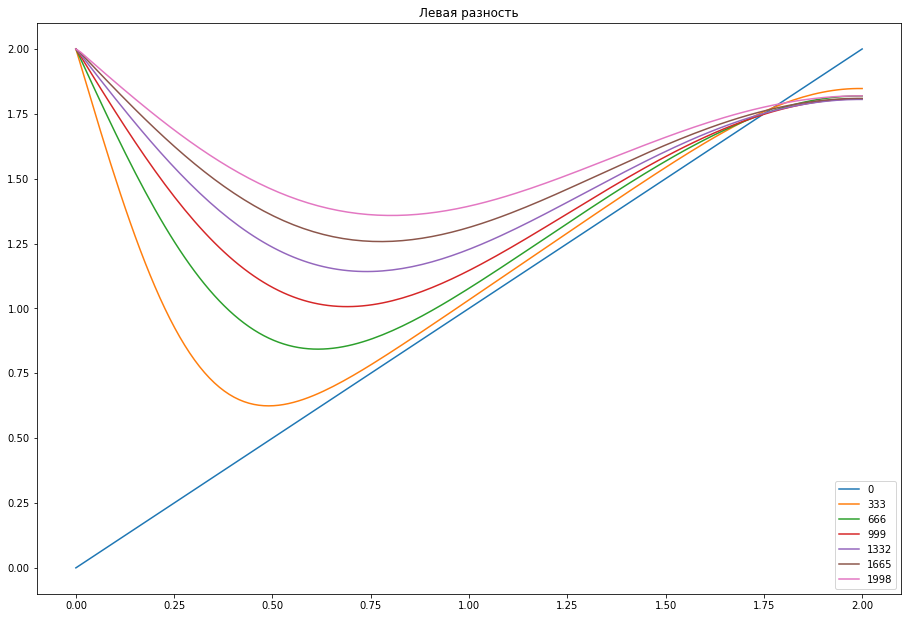

In [243]:
matrix = solve2l()
X = np.linspace(a, b, NK)

fig = plt.figure()
for i in range(0, NT, NT//6):
    plt.plot(X, matrix[i], label=i)
    plt.title("Левая разность")
    fig.set_size_inches(15.5, 10.5)
    
plt.legend()
plt.show()

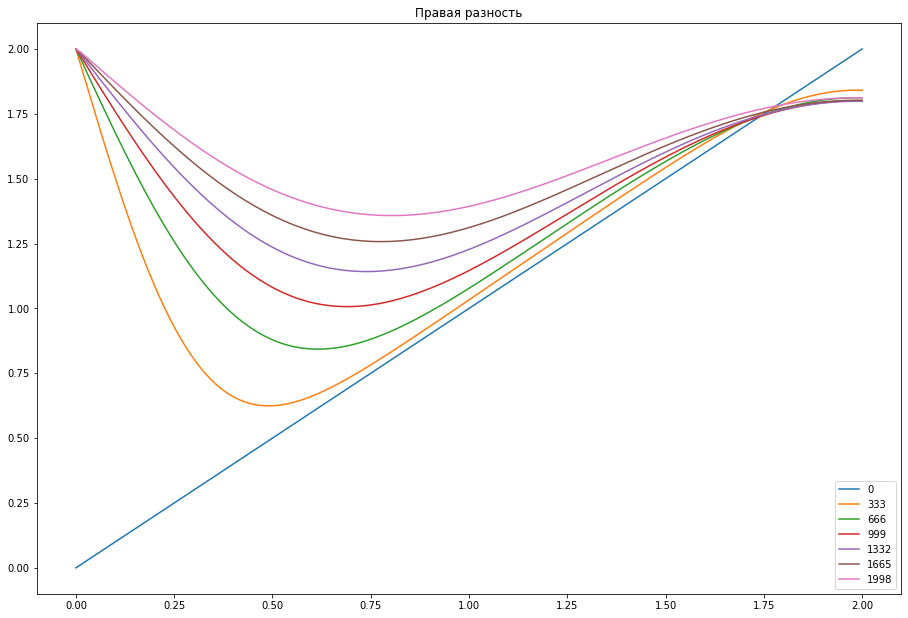

In [242]:
matrix = solve2c()
X = np.linspace(a, b, NK)

fig = plt.figure()
for i in range(0, NT, NT//6):
    plt.plot(X, matrix[i], label=i)
    plt.title("Правая разность")
    fig.set_size_inches(15.5, 10.5)
    
plt.legend()
plt.show()

In [250]:
tn1 = 30
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns) - 1, 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    M1 = solve2l()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    M2 = solve2l()
    
    sol1l = M1[tn1]
    sol1c = M2[tn1]
    sol2l = M1[tn2]
    sol2c = M2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))


df = pd.DataFrame(table, columns=['N', 
                                  't', 
                                  's(t=tn1)', 
                                  's(t=tn2)', 
                                  'max|tn1|', 'max|tn2|'])

df

,N,t,s(t=tn1),s(t=tn2),max|tn1|,max|tn2|
0,10.0,0.0001,0.045611,0.050407,0.106345,0.133634
1,20.0,0.0001,0.019317,0.015160,0.056683,0.039990
2,40.0,0.0001,0.007725,0.006592,0.021783,0.020335
3,80.0,0.0001,0.003613,0.003186,0.010972,0.010221


In [249]:
tn1 = 30
tn2 = 75

ns = [10, 20, 40, 80, 160]
table = np.zeros(shape=(len(ns) - 1, 6))
t = 0.0001
for i in range(len(ns) - 1):

    h = (b - a) / ns[i]
    NK = ns[i]
    NT = int(T / t) + 1
    
    M1 = solve2c()
    
    h = (b - a) / ns[i + 1]
    NK = ns[i + 1]
    NT = int(T / t) + 1
    
    M2 = solve2c()
    
    sol1l = M1[tn1]
    sol1c = M2[tn1]
    sol2l = M1[tn2]
    sol2c = M2[tn2]
    
    table[i][0] = ns[i]
    table[i][1] = t
    table[i][2] = sum((sol1c[::2] - sol1l) ** 2)
    table[i][3] = sum((sol2c[::2] - sol2l) ** 2)
    table[i][4] = max(abs(sol1c[::2] - sol1l))
    table[i][5] = max(abs(sol2c[::2] - sol2l))


df = pd.DataFrame(table, columns=['N', 
                                  't', 
                                  's(t=tn1)', 
                                  's(t=tn2)', 
                                  'max|tn1|', 'max|tn2|'])

df

,N,t,s(t=tn1),s(t=tn2),max|tn1|,max|tn2|
0,10.0,0.0001,0.118187,0.103509,0.293310,0.256399
1,20.0,0.0001,0.028270,0.021121,0.107161,0.088869
2,40.0,0.0001,0.008798,0.007522,0.038570,0.034834
3,80.0,0.0001,0.003798,0.003395,0.015970,0.015355


# Вывод

В рамках данной лабораторной работы были разработаны методы для решения уравнения теплопроводности с заданными граничными условиями. Основной задачей было рассмотреть ошибку вычисления методов. 
Полученные результаты подтверждают теоретические результаты анализа методов - ошибка зависит от шага $h$ как $O(h^2)$ и от шага $t$ как $O(t)$. Также стоит отметить, что для более поздних временных слоев значение ошибки меньше, чем для более ранних.

В анализе ошибки использовался метод Рунге - сравнивалась работа методов с шагом $h$ и $2h$, при этом метрика для сравнения была выбрана $L_2$ и $L_{\infty}$.

Таким образом, разработанный инструментарий позволяет исследовать указанные в задании уравнения.